## Simulation of SiN loaded LNOI coupler


Thach Nguyen

### Importing important python modules

In [1]:
%matplotlib inline

In [2]:
import reme                      # REME module
import numpy as np

********************************************************************************
         Maplotlib mplot3d toolkit3D will be used for 3D plotting.
         No module named 'enthought'
********************************************************************************


### Setting the operating wavelength

In [3]:
wavelength = 1.55e-6             # The waveguide is leaky at this wavelength
reme.set_wavelength(wavelength)

### Defining the material layer thickness parameters

In [4]:
m_linbo3_or = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TM)    # Ordinary index; using built-in Sellmier equation 
m_linbo3_ex = reme.MaterialLiNbO3(cut_axis='X', propagation_axis='Y', polarisation=reme.Polarisation.TE)    # Extradinary index; using built-in Sellmier equation 

m_sin = reme.SellmierMaterial(1, 3.0249, 0.1353406 ** 2, 40314, 1239.842 ** 2, 0, 0,'SiN')  
# Run reme.SellmierMaterial? in a new cell for explantion of parameters when defining material using Sellmier equation
m_sio2 = reme.MaterialSiO2()
m_air = reme.MaterialAir()

In [5]:
# Define anisotropic LiNbO3: X-cut, Y-propagating
m_linbo3_y = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Y')   # Anisotropic LiNbO3 
m_linbo3_z = reme.AnisotropicMaterialLiNbO3(cut_axis='X', propagation_axis='Z')   # Anisotropic LiNbO3 

In [6]:
t_s = 1.5e-6                    # SiO2 bottom thickness
t_c = 1.5e-6                    # Sio2 cover thickness
t_linbo3 = 0.3e-6             # LNOI film thickness
t_sin = 300e-9                # Unetched SiN film thickness
core_width = 1.0e-6             # Waveguide core width
clad_width = 3e-6 # Simulation window width
gap = 0.95e-6
radius = 300e-6

### Slab modes

In [7]:
core_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_te_y = reme.Slab(m_sio2(t_s) + m_linbo3_ex(t_linbo3) + m_air(t_s + t_sin))
core_te_y.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_y.set_TM(False)
core_te_y.find_modes()
clad_te_y.find_modes()

In [8]:
n_te_core_y = core_te_y.get_effective_index_TE(0).real
n_te_clad_y = clad_te_y.get_effective_index_TE(0).real

In [9]:
core_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_tm_y = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_y.set_TE(False)
clad_tm_y.set_TE(False)

In [10]:
core_tm_y.find_modes()
clad_tm_y.find_modes()

In [11]:
n_tm_core_y = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_y = clad_tm_y.get_effective_index_TM(0).real

In [12]:
n_te_clad_y

1.7386315160938541

In [13]:
n_te_core_y

1.898580759383995

In [14]:
core_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_te_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_te_z.set_TM(False)     # Only consider TE slab modes, no TM slab modes
clad_te_z.set_TM(False)
core_te_z.find_modes()
clad_te_z.find_modes()

In [15]:
n_te_core_z = core_te_z.get_effective_index_TE(0).real
n_te_clad_z = clad_te_z.get_effective_index_TE(0).real

In [16]:
core_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_sin(t_sin) + m_air(t_s))
clad_tm_z = reme.Slab(m_sio2(t_s) + m_linbo3_or(t_linbo3) + m_air(t_s + t_sin))
core_tm_z.set_TE(False)
clad_tm_z.set_TE(False)

In [17]:
core_tm_z.find_modes()
clad_tm_z.find_modes()

In [18]:
n_tm_core_z = core_tm_y.get_effective_index_TM(0).real
n_tm_clad_z = clad_tm_y.get_effective_index_TM(0).real

In [19]:
n_te_clad_z

1.8008959986492756

In [20]:
n_te_core_z

1.9451758911532857

### Simulate 2D waveguide mode

#### Defining a RWG waveguide geometry from core and cladding slabs

We need to use anisotropic LiNbO3 when defining the waveguides

In [21]:
clad_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_air(t_s + t_sin))
core_y = reme.Slab(m_sio2(t_s) + m_linbo3_y(t_linbo3) + m_sin(t_sin) + m_air(t_s))

In [22]:
clad_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_air(t_s + t_sin))
core_z = reme.Slab(m_sio2(t_s) + m_linbo3_z(t_linbo3) + m_sin(t_sin) + m_air(t_s))

In [23]:
rwg_z = reme.RWG(clad_z(clad_width) + core_z(core_width) + clad_z(clad_width))

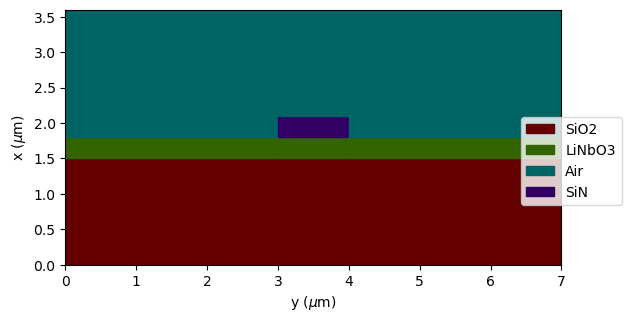

In [24]:
# View the waveguide structure
rwg_z.view()

In [25]:
guide_straight_z = reme.FDStraight(rwg_z, 101, 401, cell_averaging=True)
guide_straight_z.set_left_boundary(reme.PEC)        
guide_straight_z.set_right_boundary(reme.PEC)

In [26]:
guide_bent_z = reme.FDBent(rwg_z, 101, 401, cell_averaging=True)
guide_bent_z.set_radius(radius)
guide_bent_z.set_left_boundary(reme.PEC)        
guide_bent_z.set_right_boundary(reme.PEC)

In [27]:
guide_straight_z.find_mode(n_te_core_z)

0

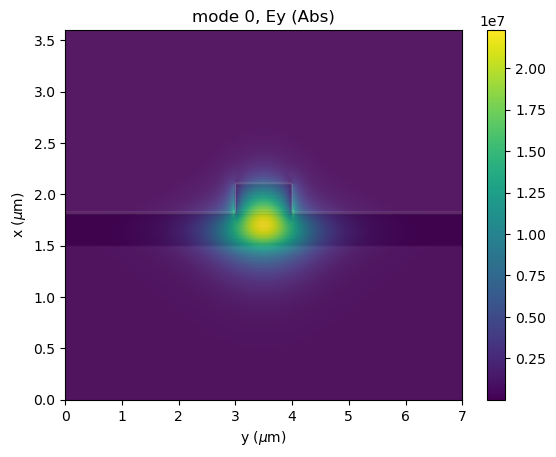

In [28]:
guide_straight_z.plot_mode(0, 'Ey', 'Abs')

In [29]:
neff_straight_z = guide_straight_z.get_mode_effective_index(0).real

In [30]:
guide_bent_z.find_mode(neff_straight_z * 2.0 * np.pi / 1.55e-6 * radius)

0

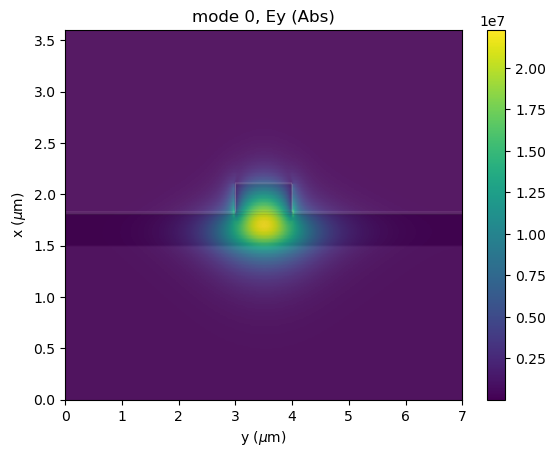

In [31]:
guide_bent_z.plot_mode(0, 'Ey', 'Abs')

### Define the coupler

In [32]:
# Define the coupler section of racetrack ring, it has two waveguide paths: a ring and straight waveguide
coupler = reme.Coupler(2)
coupler.add_bent_guide(0, guide_bent_z)
coupler.add_straight_guide(0, guide_straight_z)

In [33]:
# The bus waveguide is offset by w+G; For the coupler between two rings you need to add a bent waveguide to path 1 as well (similar to the previous cell)
coupler.add_straight_guide(1, guide_straight_z, core_width + gap)

In [34]:
coupler.set_straight_length(0, 0e-6)
coupler.set_coupler_length(100e-6)

In [35]:
# Number of cross-secion sampling points used in the integrations
coupler.set_sampling(101, 401)

In [36]:
# Number of propagation steps along z-direction
coupler.set_num_steps(101)

In [37]:
# Calculate the coupler response
coupler.calculate()

In [38]:
print("Coupler transfer ratio: {}".format(abs(coupler.get_S_reduced(0, 0, 0, 0))**2))
print("Coupler coupling ratio: {}".format(abs(coupler.get_S_reduced(1, 0, 0, 0))**2))


Coupler transfer ratio: 0.7941688878915512
Coupler coupling ratio: 0.20459359955989978


In [39]:
# Open a dialog to plot the transfer matrix evolution
#coupler.plot_transfer_matrix()

In [40]:
abs(coupler.get_S_reduced(0, 0, 0, 0))**2 + abs(coupler.get_S_reduced(1, 0, 0, 0))**2

0.9987624874514509

In [41]:
coupler.get_S(0, 0, 0, 0)

(-0.6079551315193459+0.651582263379572j)

### Scan the straight section length

In [42]:
num_points = 51
lengths = np.linspace(0, 250e-6, num_points)
coupler_cross_coupling_bent_straight = np.zeros(num_points)
coupler_straigth_coupling_bent_bent = np.zeros(num_points)
coupler_cross_coupling_straight_bent = np.zeros(num_points)
coupler_straigth_coupling_straight_straight = np.zeros(num_points)

In [43]:
for i in range(num_points):
    coupler.set_straight_length(0, lengths[i])
    coupler.set_coupler_length(100e-6 + lengths[i])
    coupler.calculate()
    coupler_cross_coupling_bent_straight[i] = abs(coupler.get_S_reduced(0, 1, 0, 0))**2
    coupler_straigth_coupling_bent_bent[i] = abs(coupler.get_S_reduced(0, 0, 0, 0))**2
    coupler_cross_coupling_straight_bent[i] = abs(coupler.get_S_reduced(1, 0, 0, 0))**2
    coupler_straigth_coupling_straight_straight[i] = abs(coupler.get_S_reduced(1, 1, 0, 0))**2

In [44]:
#coupler.plot_transfer_matrix()

In [45]:
import matplotlib.pyplot as plt

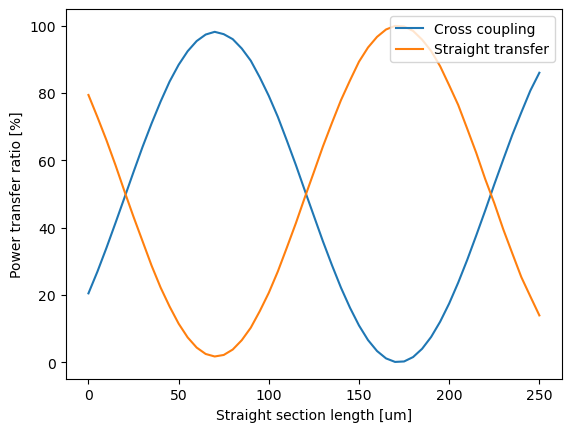

In [46]:
plt.plot(lengths * 1e6, coupler_cross_coupling_straight_bent * 100, label="Cross coupling")
# plt.plot(lengths * 1e6, coupler_cross_coupling_bent_straight * 100, label="Cross coupling_2")
plt.plot(lengths * 1e6, coupler_straigth_coupling_bent_bent * 100, label="Straight transfer")
plt.xlabel("Straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend()
plt.show()

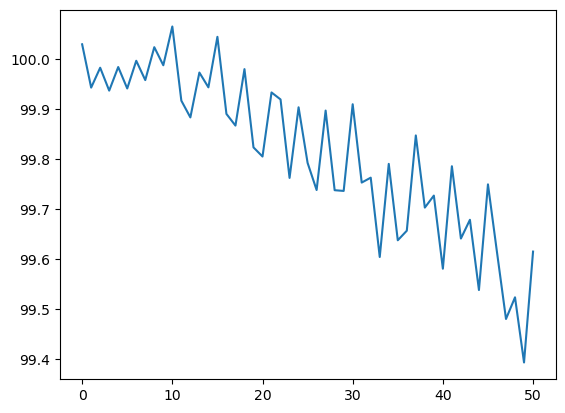

In [613]:
plt.plot(lengths * 1e6, (coupler_cross_coupling_straight_bent + coupler_straigth_coupling_bent_bent) * 100, label="Cross coupling")
plt.show()

### Coupler length to achieve critical coupling

Bending radius: 300um

Straight section length: 300um

For different loss values

In [614]:
straight_section_length = 300e-6

In [615]:
def round_trip_power_transmission(propagation_loss):
    loss = (2.0 * np.pi * radius + straight_section_length * 2.0) * 100 * propagation_loss
    return 10.0 ** (-loss / 10)    

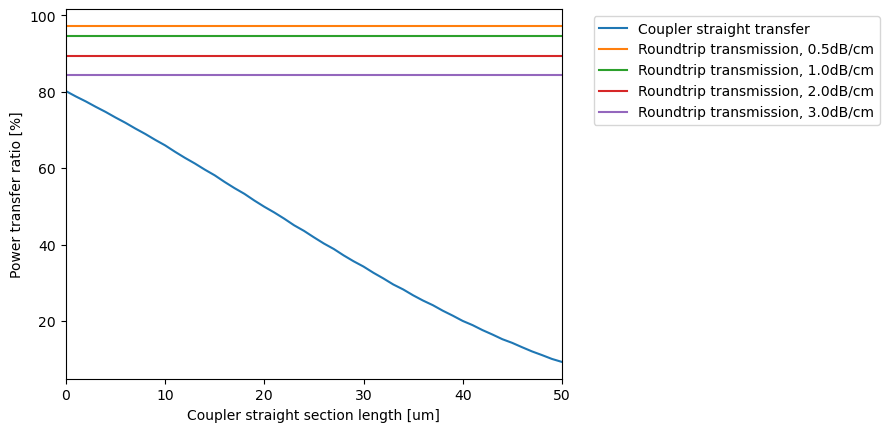

In [616]:
plt.plot(lengths * 1e6, coupler_straigth_coupling_bent_bent * 100, label="Coupler straight transfer")
plt.plot(lengths * 1e6, [round_trip_power_transmission(0.5) * 100 for x in lengths], label="Roundtrip transmission, 0.5dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(1.0) * 100 for x in lengths], label="Roundtrip transmission, 1.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(2.0) * 100 for x in lengths], label="Roundtrip transmission, 2.0dB/cm")
plt.plot(lengths * 1e6, [round_trip_power_transmission(3.0) * 100 for x in lengths], label="Roundtrip transmission, 3.0dB/cm")
plt.xlim(0, 50)
plt.xlabel("Coupler straight section length [um]")
plt.ylabel("Power transfer ratio [%]")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [617]:
a = reme.FMMBent(rwg_z)

In [618]:
a.find_modes?

Signature:
a.find_modes(
    max_num_modes=None,
    nmax=None,
    nmin=0.0,
    clear_existing_modes=True,
    scan_step=None,
    n_imag=0.0,
)
Docstring:
Calculate the waveguide modes

:param int max_num_modes: Maximum number of modes to be found. If not given,
    the value set by ``set_max_waveguide_modes`` will be used
:param float nmax: Maximum value of the real part of the effective indices.
    If not given, the value of maximum waveguide effective index will be used
:param float nmin: Minimum value of the real part of the effective indices
:param float scan_step: The scan step when searching for modes in FMM solvers.
    If not given, the value set by ``set_fmm_scan_step`` will be used
:param bool clear_existing_modes: If true, existing modes will be removed
:param float n_imag: The imaginary part of the effective index when scanning
    for modes.


.. Note:: nmax, nmin and scan_step refer to azimuthal effective index in
    :class:`~rememode.rememode.FMMBent` solver

.. No